In [1]:
import numpy as  np
import matplotlib.pyplot as plt

In [2]:
class Neural_Network(object):
    def __init__(self):
        # Define HyperParameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
 
        # Weights (parameters)
        self.W1 = np.random.rand(self.inputLayerSize, \
                                 self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize, \
                                  self.outputLayerSize)
    def forward(self, X):
        # Propogate inputs through net
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoidPrime(self, z):
        return np.exp(-z) / ((1 + np.exp(-z)) ** 2)

    def costFunction(self, X, y):
        self.yHat = self.forward(X)
        J = 0.5 * sum((y - self.yHat) ** 2)
        return J
    
    def costFunctionPrime(self, X, y):
        self.yHat = self.forward(X)
        delta3 = np.multiply(-(y - self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
    
        delta2 = np.dot(delta3, self.W2.T) * self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)
    
        return dJdW1, dJdW2
    

In [3]:
X = np.array([[3, 5], [5, 1], [10, 2]])
y = np.array([[0.75], [0.82], [0.93]])

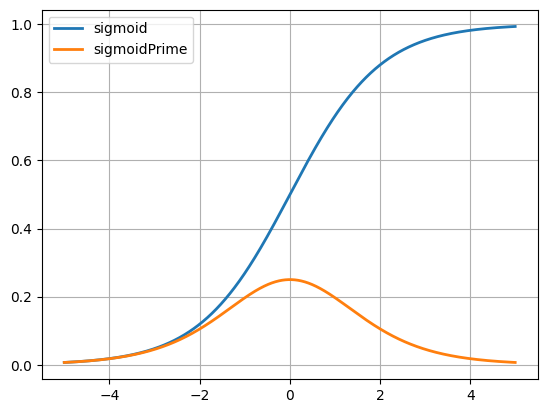

In [21]:
testValues = np.arange(-5, 5, 0.01)
plt.plot(testValues, sigmoid(testValues), linewidth = 2)
plt.plot(testValues, sigmoidPrime(testValues), linewidth = 2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])

In [5]:
sigmoid(1)

0.7310585786300049

In [6]:
sigmoid(np.array([-1, 0, 1]))

array([0.26894142, 0.5       , 0.73105858])

In [7]:
sigmoid(np.random.randn(3, 3))

array([[0.76759193, 0.62111413, 0.87300364],
       [0.40929416, 0.47367983, 0.35036351],
       [0.42468485, 0.5376386 , 0.58529602]])

In [8]:
NN = Neural_Network()

In [9]:
yHat = NN.forward(X)
yHat  

array([[0.59921013],
       [0.5936395 ],
       [0.60313465]])

In [10]:
NN.W1[0, 0] = 1.1
yHat = NN.forward(X)
np.sum(0.5 * (y - yHat) ** 2)

0.0902664086944085

In [11]:
def sigmoidPrime(z):
    return np.exp(-z) / ((1 + np.exp(-z)) ** 2)

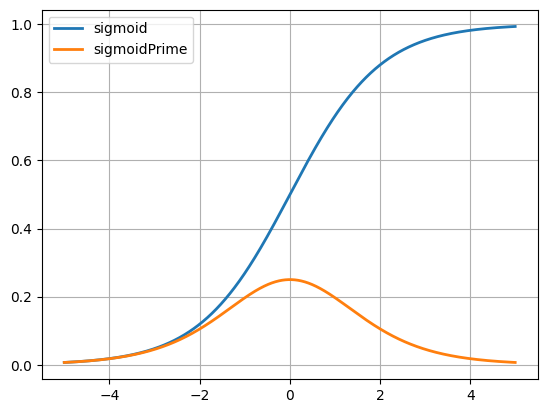

In [12]:
testValues = np.arange(-5, 5, 0.01)
plt.plot(testValues, sigmoid(testValues), linewidth = 2)
plt.plot(testValues, sigmoidPrime(testValues), linewidth = 2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoidPrime'])

In [13]:
cost1 = NN.costFunction(X, y)

In [14]:
dJdW1, dJdW2 = NN.costFunctionPrime(X, y)

In [15]:
dJdW1

array([[-1.46829124e-04, -2.17627267e-02,  8.44002401e-04],
       [-6.24175109e-05, -8.41996925e-03,  4.99609171e-04]])

In [16]:
dJdW2

array([[-0.16873483],
       [-0.15492724],
       [-0.16731146]])

In [17]:
scalar = 3
NN.W1 = NN.W1 + scalar * dJdW1
NN.W2 = NN.W2 + scalar * dJdW2
cost2 = NN.costFunction(X, y)

In [18]:
cost1, cost2

(array([0.09026641]), array([0.49260991]))

In [19]:
dJdW1, dJdW2 = NN.costFunctionPrime(X, y)
NN.W1 = NN.W1 - scalar * dJdW1
NN.W2 = NN.W2 - scalar * dJdW2
cost3 = NN.costFunction(X, y)

In [20]:
cost2, cost3

(array([0.49260991]), array([0.00785177]))